<a href="https://colab.research.google.com/github/Andersononoja/Hello-World/blob/master/Facebook_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [ ]:
consumer_key="Your consumer keys"
consumer_secret="Your consumer secret"
bearer_token="Your bearer token"
access_token="You acces token"
access_token_secret="Your access token secret"

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [ ]:
search_term = '#facebook -filter:retweets'
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2021-10-01', tweet_mode= 'extended').items(2000)
all_tweets = [tweet.full_text for tweet in tweets]

In [ ]:
#create a dataframe to store the dataframe 
df = pd.DataFrame(all_tweets, columns=['Tweets'])
# show the first five row of the data
df.head(5)

,Tweets
0,#linkedin #twitter #facebook #instagram #bitco...
1,#linkedin #twitter #facebook #instagram #tikto...
2,#linkedin #twitter #facebook #instagram #tikto...
3,#linkedin #twitter #facebook #instagram #doge ...
4,#affiliates #tumblr #twitter #facebook #instag...


In [ ]:
def cleanTwt(twt):
  twt = re.sub('#facebook', 'facebook', twt)
  twt = re.sub('#Facebook', 'Facebook', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  return twt

In [ ]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
df.head()

,Tweets,Cleaned_Tweets
0,#linkedin #twitter #facebook #instagram #bitco...,facebook SAVE BIG ON AIRPORT ...
1,#linkedin #twitter #facebook #instagram #tikto...,facebook Enjoy $10 off Orders...
2,#linkedin #twitter #facebook #instagram #tikto...,facebook Up to 15% off New Pr...
3,#linkedin #twitter #facebook #instagram #doge ...,facebook on purchases over $2...
4,#affiliates #tumblr #twitter #facebook #instag...,facebook with $25 Purchase


In [ ]:
#Create a ffunction to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
# Create a fucntion to get the Polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two columns called 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

# Show the data preview
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,#linkedin #twitter #facebook #instagram #bitco...,facebook SAVE BIG ON AIRPORT ...,0.100000,0.000000
1,#linkedin #twitter #facebook #instagram #tikto...,facebook Enjoy $10 off Orders...,0.500000,0.400000
2,#linkedin #twitter #facebook #instagram #tikto...,facebook Up to 15% off New Pr...,0.454545,0.136364
3,#linkedin #twitter #facebook #instagram #doge ...,facebook on purchases over $2...,0.000000,0.000000
4,#affiliates #tumblr #twitter #facebook #instag...,facebook with $25 Purchase,0.000000,0.000000


In [ ]:
# Create a function to the get the Sentiment of the users as (Positive, Neutral or Negative)
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
# Create a column to store the user's sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
# Preview the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,#linkedin #twitter #facebook #instagram #bitco...,facebook SAVE BIG ON AIRPORT ...,0.100000,0.000000,Neutral
1,#linkedin #twitter #facebook #instagram #tikto...,facebook Enjoy $10 off Orders...,0.500000,0.400000,Positive
2,#linkedin #twitter #facebook #instagram #tikto...,facebook Up to 15% off New Pr...,0.454545,0.136364,Positive
3,#linkedin #twitter #facebook #instagram #doge ...,facebook on purchases over $2...,0.000000,0.000000,Neutral
4,#affiliates #tumblr #twitter #facebook #instag...,facebook with $25 Purchase,0.000000,0.000000,Neutral


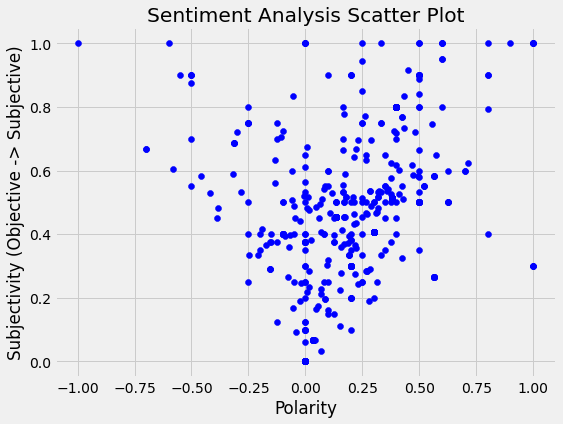

In [ ]:
# Create a scatter plot of the Subjectivity and Polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (Objective -> Subjective)')
plt.show()

The Scatter plot indicates that the sentiment from twitter users about Facebook are mostly neutral with some positively subjective sentiments.
The Scatter Plot also indicated that few of the sentiment from twitter users are negatively subjective.

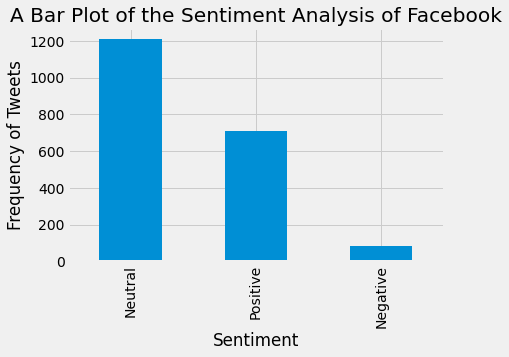

In [ ]:
# Create a Bar Chart to show the count of Positive, Neutral, and Negative Sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('A Bar Plot of the Sentiment Analysis of Facebook')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of Tweets')
plt.show()

The bar plot indicates that a large number of the tweets are neutral as regards Facebook inspite of recent happenings, while a good percentage of the tweets as regards Facebook are positive which will also indicate a support for Facebook.
The plot also shows that a very little percentage of the tweets towards Facebook are neutral. This is however, unlikely to affect the social media giant 'Facebook' which has now been rebranded to 'Meta' in any way significantly.